# <a id='toc1_'></a>[Heart Failure Prediction](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Heart Failure Prediction](#toc1_)    
- [Team Members](#toc2_)    
- [IMPORTS](#toc3_)    
- [EDA](#toc4_)    
  - [Feature Meaning Explanation](#toc4_1_)    
    - [Data Exploration](#toc4_1_1_)    
- [Visualization](#toc5_)    
  - [Distribution](#toc5_1_)    
  - [Scatter Plots](#toc5_2_)    
  - [Correlation Matrix](#toc5_3_)    
  - [IQR](#toc5_4_)    
  - [Pie Chart Plots](#toc5_5_)    
    - [Gender Counts](#toc5_5_1_)    
    - [Chest Pain Types Counts](#toc5_5_2_)    
    - [Fasting BS Counts](#toc5_5_3_)    
    - [Resting ECG Counts](#toc5_5_4_)    
    - [ExerciseAngina Counts](#toc5_5_5_)    
    - [ST Slope Counts](#toc5_5_6_)    
    - [Heart Disease Counts](#toc5_5_7_)    
  - [Swarm Plots](#toc5_6_)    
- [Conclusions](#toc6_)    
- [PCA](#toc7_)    
  - [PCA 1D](#toc7_1_)    
    - [Usnig MinMax Scaling](#toc7_1_1_)    
  - [PCA before Preprocessing 2D with the label concatenated](#toc7_2_)    
    - [Usnig MinMax Scaling](#toc7_2_1_)    
    - [Standard Scale](#toc7_2_2_)    
- [Data Cleaning and Preprocessing](#toc8_)    
  - [Missing Values](#toc8_1_)    
    - [Cholesterol](#toc8_1_1_)    
    - [RestingBP](#toc8_1_2_)    
  - [Outlier Removal](#toc8_2_)    
    - [Cholesterol](#toc8_2_1_)    
    - [ChestPainType](#toc8_2_2_)    
  - [Duplicates](#toc8_3_)    
  - [Encoding](#toc8_4_)    
    - [Label Encoding](#toc8_4_1_)    
    - [One Hot Encoding](#toc8_4_2_)    
  - [Normalization](#toc8_5_)    
    - [MinMax Scaling](#toc8_5_1_)    
    - [Standard Scaler](#toc8_5_2_)    
- [Models](#toc9_)    
  - [Phase 1](#toc9_1_)    
    - [Naive Bayes](#toc9_1_1_)    
    - [SVM](#toc9_1_2_)    
  - [Phase 2](#toc9_2_)    
    - [Decision Trees](#toc9_2_1_)    
    - [KNN](#toc9_2_2_)    
    - [MLP](#toc9_2_3_)    
    - [Logistion Regression](#toc9_2_4_)    
    - [XGBoost](#toc9_2_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Team Members](#toc0_)

| Name              | ID       |
|-------------------|----------|
| Seif Yasser       | 21P0102  |
| Mohammed Yasser   | 2100921  |
| Omar Ahmed        | 22P0109  |


# <a id='toc3_'></a>[IMPORTS](#toc0_)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import joblib
from mpl_toolkits.mplot3d import Axes3D
from config import cfg
from Utils.Visualizer import Visualizer
from Utils.mlflow import log_models_to_mlflow

In [5]:
cfg

{'HeartFailure': {'PATH': '../Dataset/dataset.csv',
  'LOGS_LOSSES_PATH': '../Logs/Losses',
  'LOGS_PLOTS_PATH': '../Logs/Plots'}}

In [ ]:
data=pd.read_csv(cfg.HeartFailure.PATH)

# <a id='toc4_'></a>[EDA](#toc0_)

In [ ]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## <a id='toc4_1_'></a>[Feature Meaning Explanation](#toc0_)

**Limits** are for normal person 

- **<span style="color:red;">Age:</span>**  
  The individual’s age in years. Age is a key factor in analyzing health risks.  

- **<span style="color:red;">Sex:</span>**  
  Represents the gender of the individual:  
  - `M`: Male  
  - `F`: Female  

- **<span style="color:red;">ChestPainType:</span>**  
  Describes the type of chest pain experienced:  
  - `ATA`: Atypical Angina – Not heart-related discomfort.  
  - `NAP`: Non-Anginal Pain – Pain unrelated to cardiac issues.  
  - `ASY`: Asymptomatic – No noticeable chest pain.  

- **<span style="color:red;">RestingBP:</span>**  
  Blood pressure (in mm Hg) when at rest. Higher values suggest cardiovascular strain.  
  - **Limits:** Typically ranges from 80 to 200 mm Hg.  

- **<span style="color:red;">Cholesterol:</span>**  
  The amount of cholesterol in the blood (mg/dL). High levels can lead to heart risks.  
  - **Limits:** Typically ranges from 100 to 564 mg/dL.  

- **<span style="color:red;">FastingBS:</span>**  
  Indicates fasting blood sugar levels:  
  - `1`: Greater than 120 mg/dL (high fasting sugar).  
  - `0`: Less than or equal to 120 mg/dL (normal fasting sugar).  

- **<span style="color:red;">RestingECG:</span>**  
  Results from a resting electrocardiogram (ECG), showing heart's electrical activity:  
  - `Normal`: No abnormalities detected.  
  - `ST`: Abnormal ST-T wave patterns, possibly indicating heart issues.  
  - `Others`: Other findings outside normal or ST-T wave results.  

- **<span style="color:red;">MaxHR:</span>**  
  Maximum heart rate achieved during exercise. Lower rates can point to heart problems.  
  - **Limits:** Typically ranges from 60 to 202 bpm (beats per minute).  

- **<span style="color:red;">ExerciseAngina:</span>**  
  Whether exercise induces angina (chest pain):  
  - `Y`: Yes  
  - `N`: No  

- **<span style="color:red;">Oldpeak:</span>**  
  ST depression on an ECG during exercise relative to rest. Indicates heart’s response to stress.  
  - **Limits:** Typically ranges from 0.0 to 6.2.  

- **<span style="color:red;">HeartDisease:</span>**  
  Target variable indicating whether the individual has heart disease:  
  - `1`: Presence of heart disease.  
  - `0`: Absence of heart disease.  


### <a id='toc4_1_1_'></a>[Data Exploration](#toc0_)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


> No Nulls

In [6]:
data.select_dtypes(include=['int','float']).describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [7]:
for i in data.columns:
    print("Number of Unique Values in ",i,':',data[i].nunique())
    print("Unique Values in ",i,':',data[i].unique()) if data[i].nunique()<10 else print()
    # print()

Number of Unique Values in  Age : 50

Number of Unique Values in  Sex : 2
Unique Values in  Sex : ['M' 'F']
Number of Unique Values in  ChestPainType : 4
Unique Values in  ChestPainType : ['ATA' 'NAP' 'ASY' 'TA']
Number of Unique Values in  RestingBP : 67

Number of Unique Values in  Cholesterol : 222

Number of Unique Values in  FastingBS : 2
Unique Values in  FastingBS : [0 1]
Number of Unique Values in  RestingECG : 3
Unique Values in  RestingECG : ['Normal' 'ST' 'LVH']
Number of Unique Values in  MaxHR : 119

Number of Unique Values in  ExerciseAngina : 2
Unique Values in  ExerciseAngina : ['N' 'Y']
Number of Unique Values in  Oldpeak : 53

Number of Unique Values in  ST_Slope : 3
Unique Values in  ST_Slope : ['Up' 'Flat' 'Down']
Number of Unique Values in  HeartDisease : 2
Unique Values in  HeartDisease : [0 1]


> 💡**Note:** No Duplicates Rows in the dataset 

In [8]:
data.duplicated().sum()

0

> 💡**Note:** No Null values in the dataset 

In [9]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
data[data['ChestPainType']=='TA']['HeartDisease'].value_counts()

HeartDisease
0    26
1    20
Name: count, dtype: int64

In [11]:
(data['FastingBS'].value_counts()[0]/data['FastingBS'].value_counts().sum())*100

76.68845315904139

In [12]:
# data['FastingBS'].value_counts()
data[['FastingBS','HeartDisease']].value_counts()

FastingBS  HeartDisease
0          0               366
           1               338
1          1               170
           0                44
Name: count, dtype: int64

> 💡**Note:** nearly 77% of the FastinBS values are 0, it could be removed if necessary 

In [13]:
data[['RestingECG','HeartDisease']].value_counts()

RestingECG  HeartDisease
Normal      1               285
            0               267
ST          1               117
LVH         1               106
            0                82
ST          0                61
Name: count, dtype: int64

In [14]:
data['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [15]:
data[data['Oldpeak']<0][['Oldpeak','HeartDisease']]

,Oldpeak,HeartDisease
321,-0.9,1
324,-2.6,1
325,-1.5,1
326,-0.1,0
331,-1.0,1
332,-1.1,0
334,-0.7,1
335,-0.8,1
352,-1.0,1
407,-0.5,1


> 💡**Note:** No negative values in Oldpeak it will be converted to Positive

In [ ]:
data['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

# <a id='toc5_'></a>[Visualization](#toc0_)

## <a id='toc5_1_'></a>[Distribution](#toc0_)

> - Histograms (kde=True)

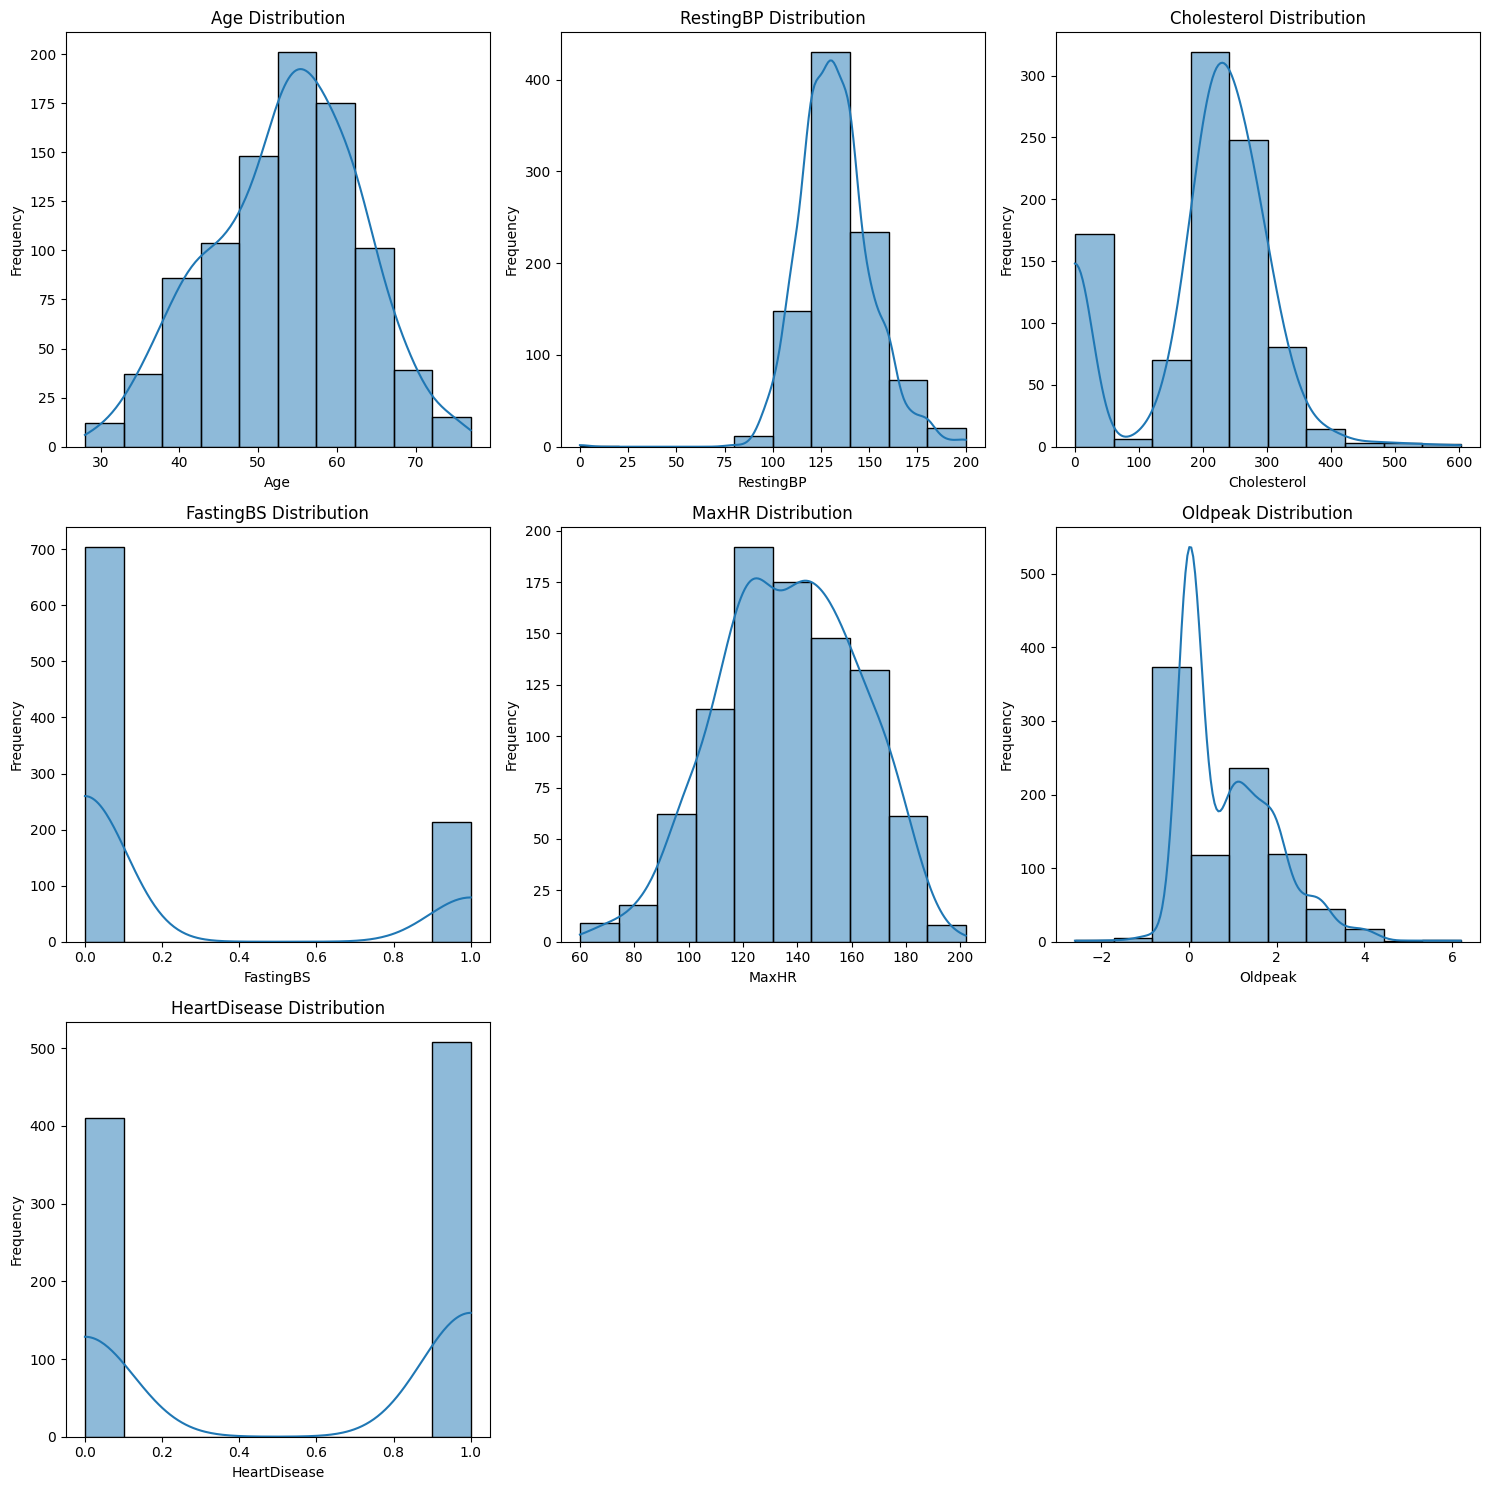

In [ ]:
numeric_features = data.select_dtypes(include=['int', 'float']).columns

fig, axes = plt.subplots(nrows=(len(numeric_features) + 2) // 3, ncols=3, figsize=(15, 5 * ((len(numeric_features) + 2) // 3)))
axes = axes.flatten()
for ax, feature in zip(axes, numeric_features):
    sns.histplot(data[feature], bins=10, kde=True, ax=ax)
    ax.set_title(f'{feature} Distribution')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
# Hide any unused subplots
for i in range(len(numeric_features), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

## <a id='toc5_2_'></a>[Scatter Plots](#toc0_)

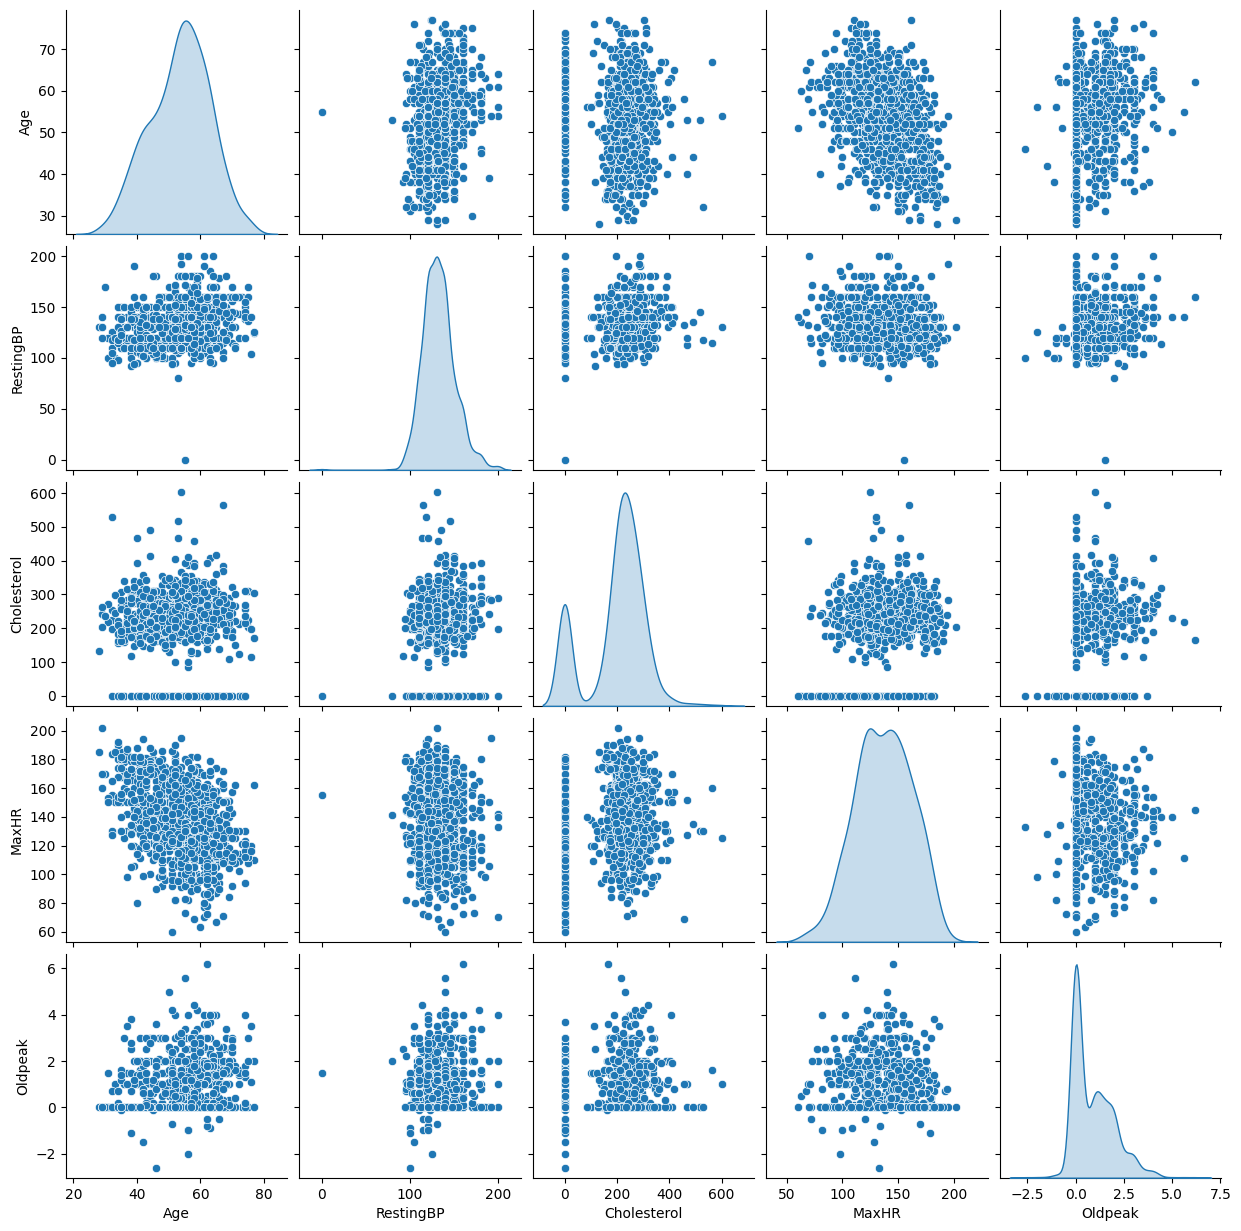

In [ ]:
sns.pairplot(data[numeric_features].drop(columns=['FastingBS','HeartDisease']), diag_kind='kde')  
plt.show()

## <a id='toc5_3_'></a>[Correlation Matrix](#toc0_)

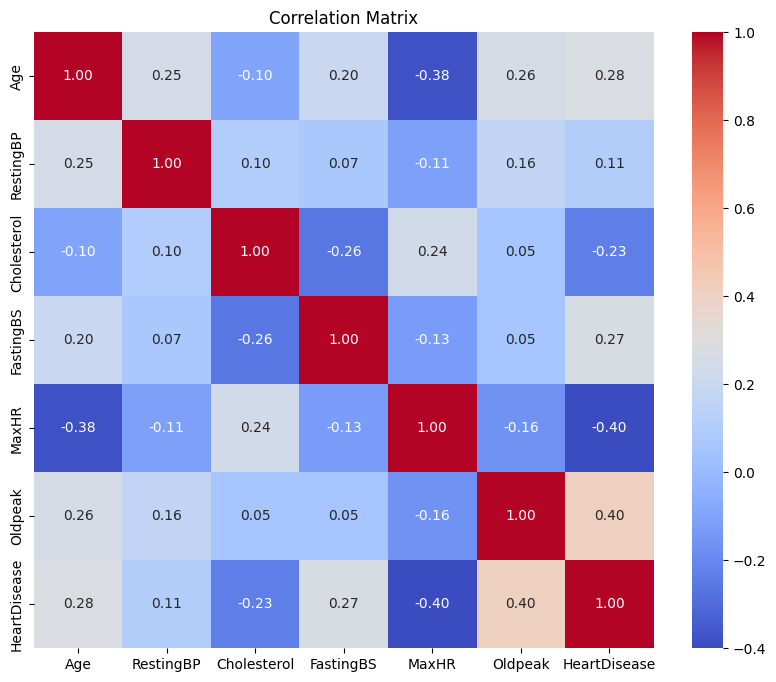

In [ ]:
corr_matrix = data.select_dtypes(['int','float']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=False)
plt.title('Correlation Matrix')
plt.show()

## <a id='toc5_4_'></a>[IQR](#toc0_)

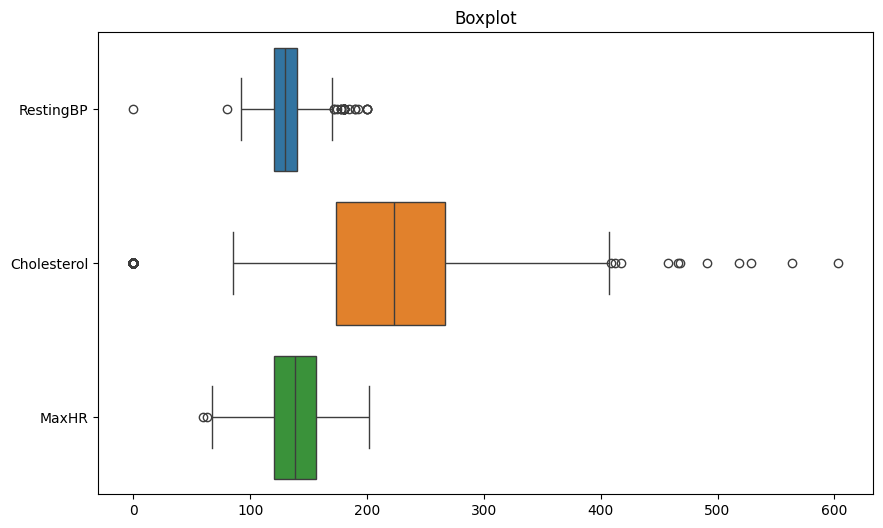

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.drop(columns=['Age','Oldpeak','HeartDisease','FastingBS']), orient='h')
plt.title('Boxplot')
plt.show()

In [ ]:
data[data['RestingBP']>180]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
372,63,M,ASY,185,0,0,Normal,98,Y,0.0,Up,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


## <a id='toc5_5_'></a>[Pie Chart Plots](#toc0_)

In [ ]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [23]:
def pie_chart(data, column):
    grouped_data=data.groupby(column)
    counts = grouped_data['Age'].count()
    plt.figure(figsize=(8, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.legend(title='Count', labels=[f'{gender}: {count}' for gender, count in counts.items()])
    plt.title('Count of '+' and '.join(data[column].unique().astype(str)))
    plt.show()

In [24]:
def compact_pie_chart(data, column,ax):
    grouped_data = data.groupby(column)
    counts = grouped_data['Age'].count()
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    ax.legend(title=f'Count of {column}', labels=[f'{label}: {count}' for label, count in counts.items()], title_fontsize='7', fontsize='5', loc='best')
    ax.set_title('Count of ' + ' and '.join(data[column].unique().astype(str)))

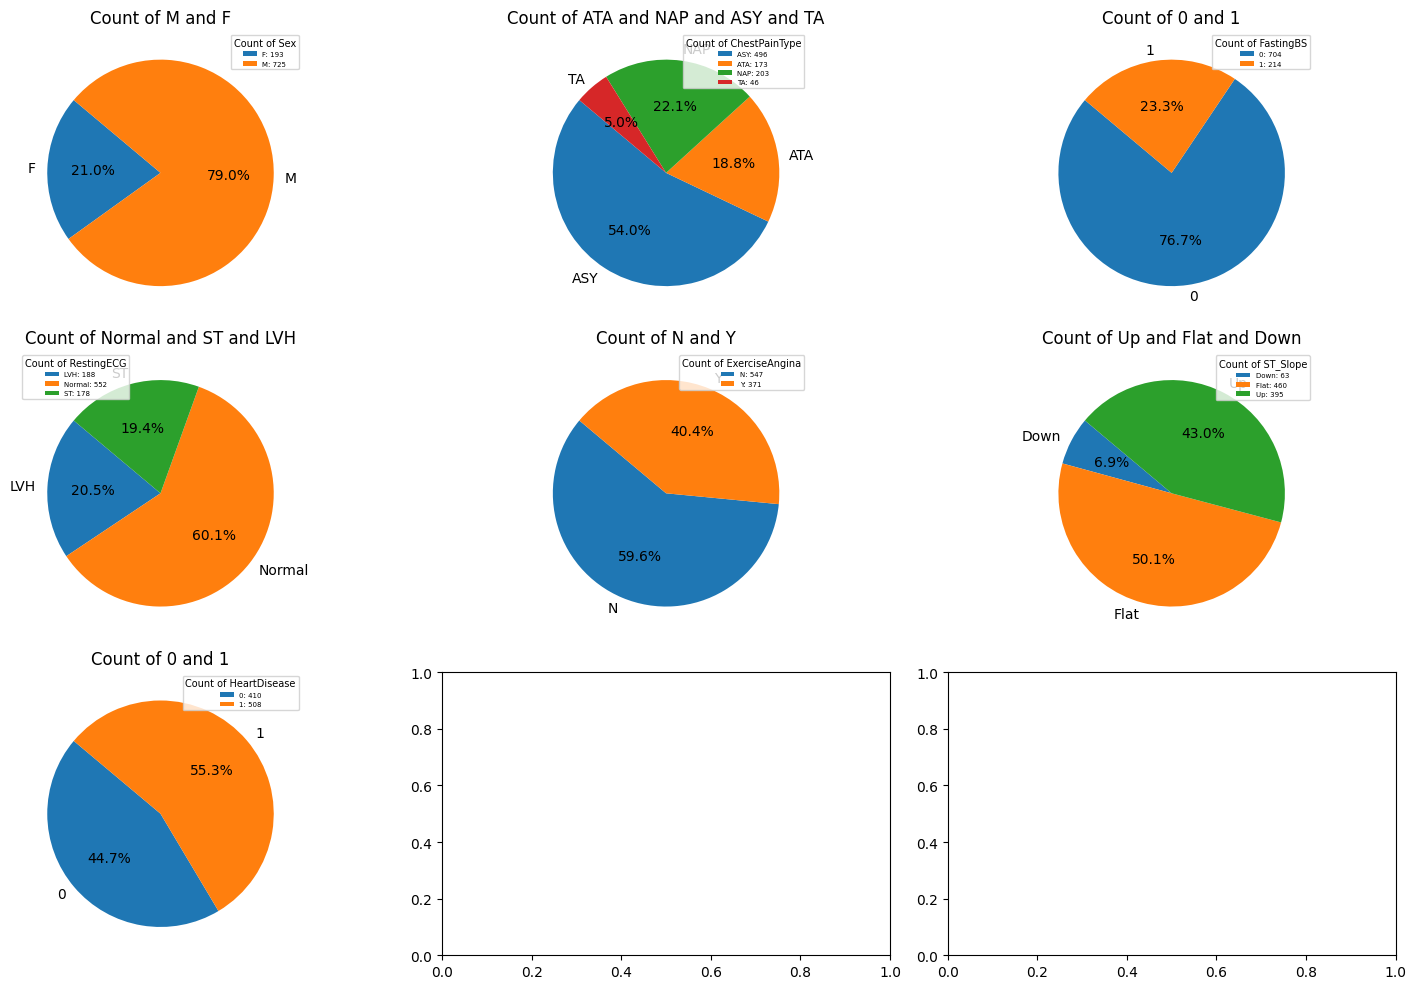

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()
columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

for ax, column in zip(axes, columns):
    compact_pie_chart(data, column, ax)

plt.tight_layout()
plt.show()

### <a id='toc5_5_1_'></a>[Gender Counts](#toc0_)

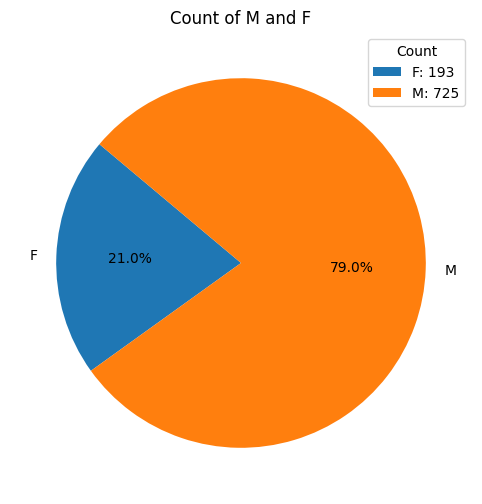

In [ ]:
pie_chart(data,'Sex')

### <a id='toc5_5_2_'></a>[Chest Pain Types Counts](#toc0_)

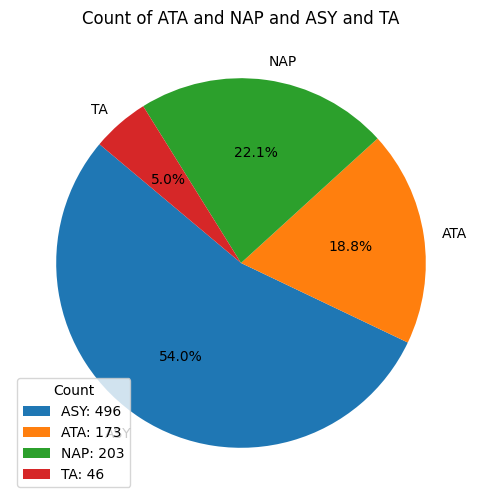

In [ ]:
pie_chart(data,'ChestPainType')

### <a id='toc5_5_3_'></a>[Fasting BS Counts](#toc0_)

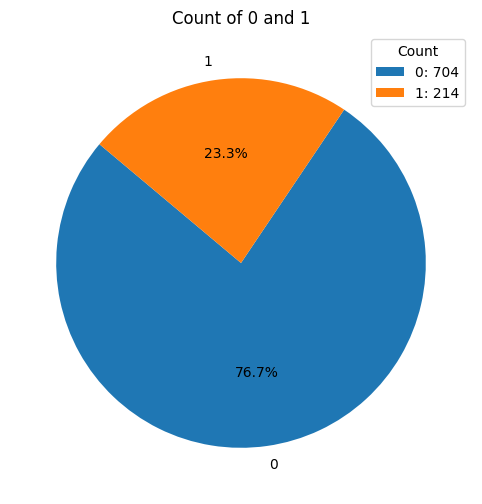

In [ ]:
pie_chart(data,'FastingBS')

### <a id='toc5_5_4_'></a>[Resting ECG Counts](#toc0_)

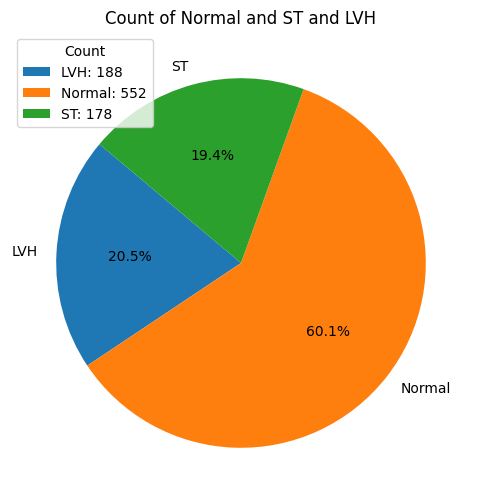

In [ ]:
pie_chart(data,'RestingECG')

### <a id='toc5_5_5_'></a>[ExerciseAngina Counts](#toc0_)

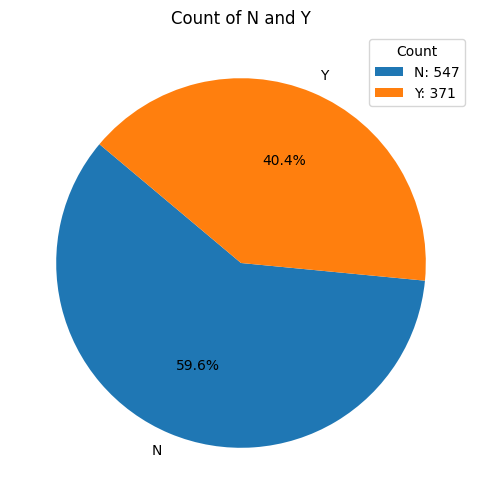

In [ ]:
pie_chart(data,'ExerciseAngina')

### <a id='toc5_5_6_'></a>[ST Slope Counts](#toc0_)

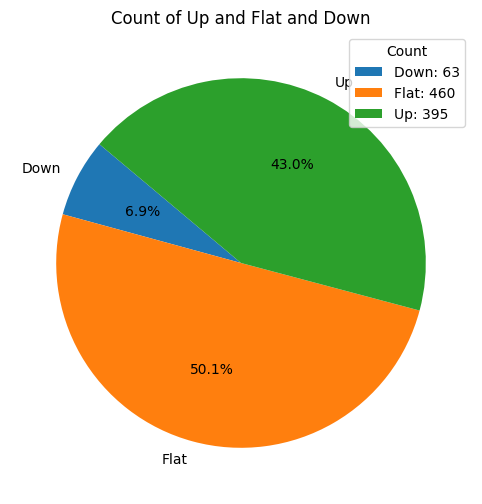

In [ ]:
pie_chart(data,'ST_Slope')

### <a id='toc5_5_7_'></a>[Heart Disease Counts](#toc0_)

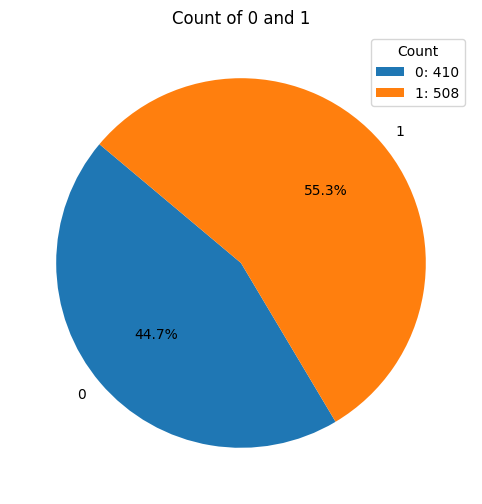

In [ ]:
pie_chart(data,'HeartDisease')

## <a id='toc5_6_'></a>[Swarm Plots](#toc0_)

> **could be removed in the future**

C:\Users\Seif Yasser\AppData\Local\Temp\ipykernel_52336\3885371014.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = cols , y = 'Sex' , data = data , palette = 'vlag')
c:\Users\Seif Yasser\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 57.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Seif Yasser\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Seif Yasser\AppData\Local\Temp\ipykernel_52336\3885371014.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wi

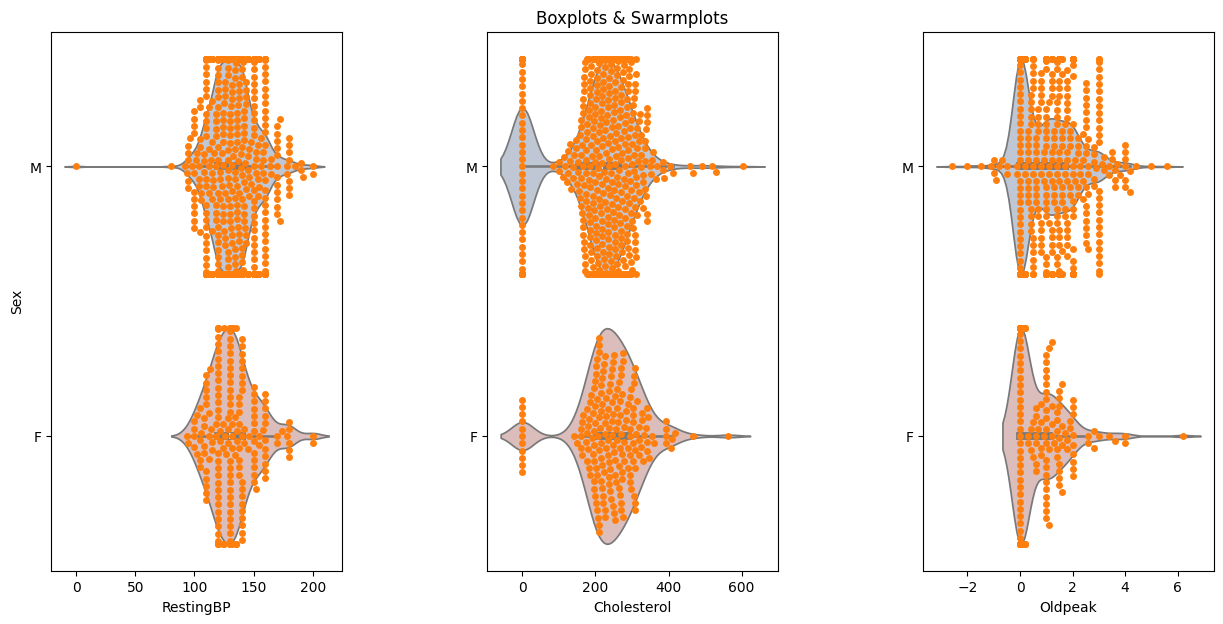

In [ ]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['RestingBP' , 'Cholesterol' , 'Oldpeak']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Sex' , data = data , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Sex' , data = data)
    plt.ylabel('Sex' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

# <a id='toc6_'></a>[Conclusions](#toc0_)

In [ ]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',categorical_features)
print('Numerical Features :',numerical_features)

Categorical Features : ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
Numerical Features : ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


In [35]:
# Discretize RestingBP
discrete_data = data.copy()
# Discretize RestingBP
discrete_data['RestingBP_Group'] = [ int(i / 5) for i in discrete_data['RestingBP']]
discrete_data['Cholesterol_Group'] = [ int(i / 10) for i in discrete_data['Cholesterol']]
discrete_data['MaxHR_Group'] = [ int(i / 5) for i in discrete_data['MaxHR']]
discrete_data['Oldpeak_Group'] = [ int((i*10) / 5) for i in discrete_data['Oldpeak']]

discrete_data.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingBP_Group,Cholesterol_Group,MaxHR_Group,Oldpeak_Group
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,28,28,34,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,32,18,31,2
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,26,28,19,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,27,21,21,3
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,30,19,24,0


In [36]:
discrete_data['Oldpeak_Group']

0      0
1      2
2      0
3      3
4      0
      ..
913    2
914    6
915    2
916    0
917    0
Name: Oldpeak_Group, Length: 918, dtype: int64

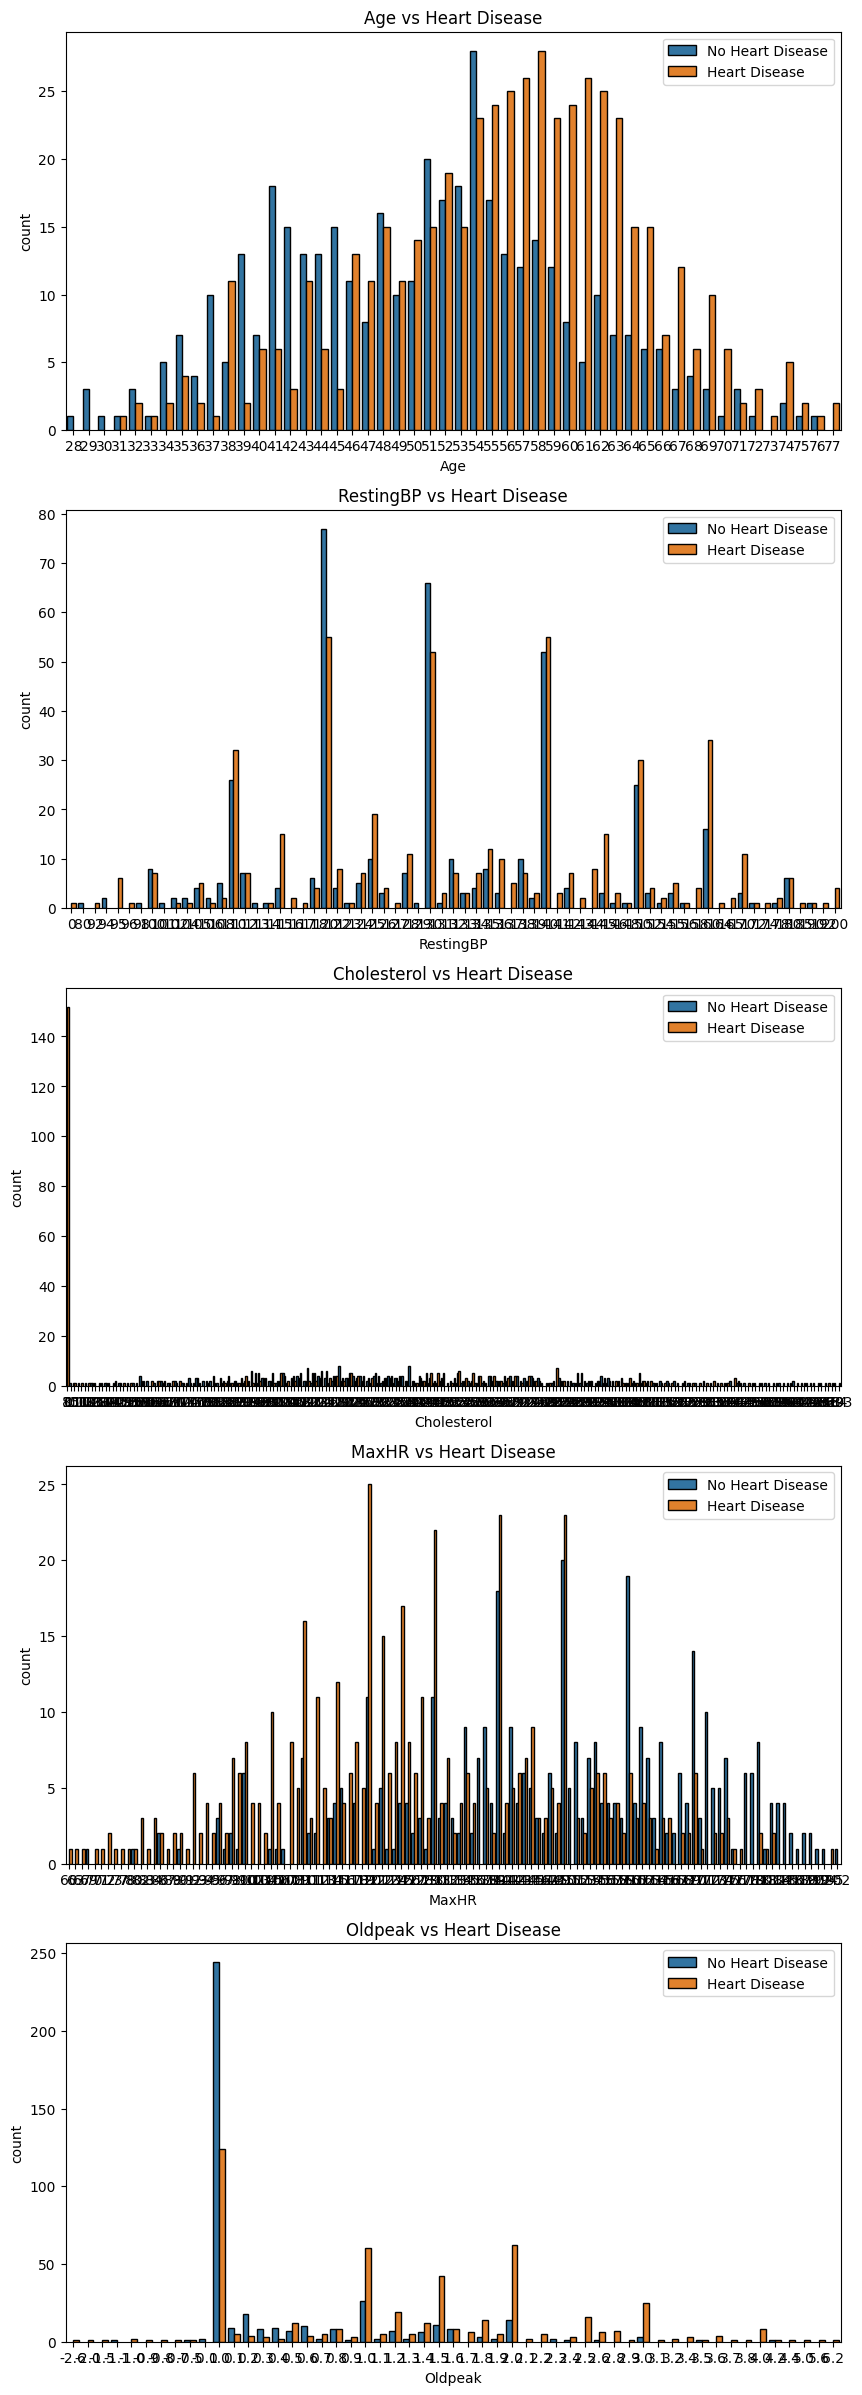

In [37]:
fig, ax = plt.subplots(nrows = 5,ncols = 1,figsize = (10,30))
for i in range(len(numerical_features)):
    plt.subplot(5,1,i+1)
    sns.countplot(x=numerical_features[i], data=data, hue="HeartDisease", edgecolor='black')
    title = numerical_features[i] + ' vs Heart Disease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title)

In [38]:
group_numerical_features = ['RestingBP_Group','Cholesterol_Group','MaxHR_Group','Oldpeak_Group']

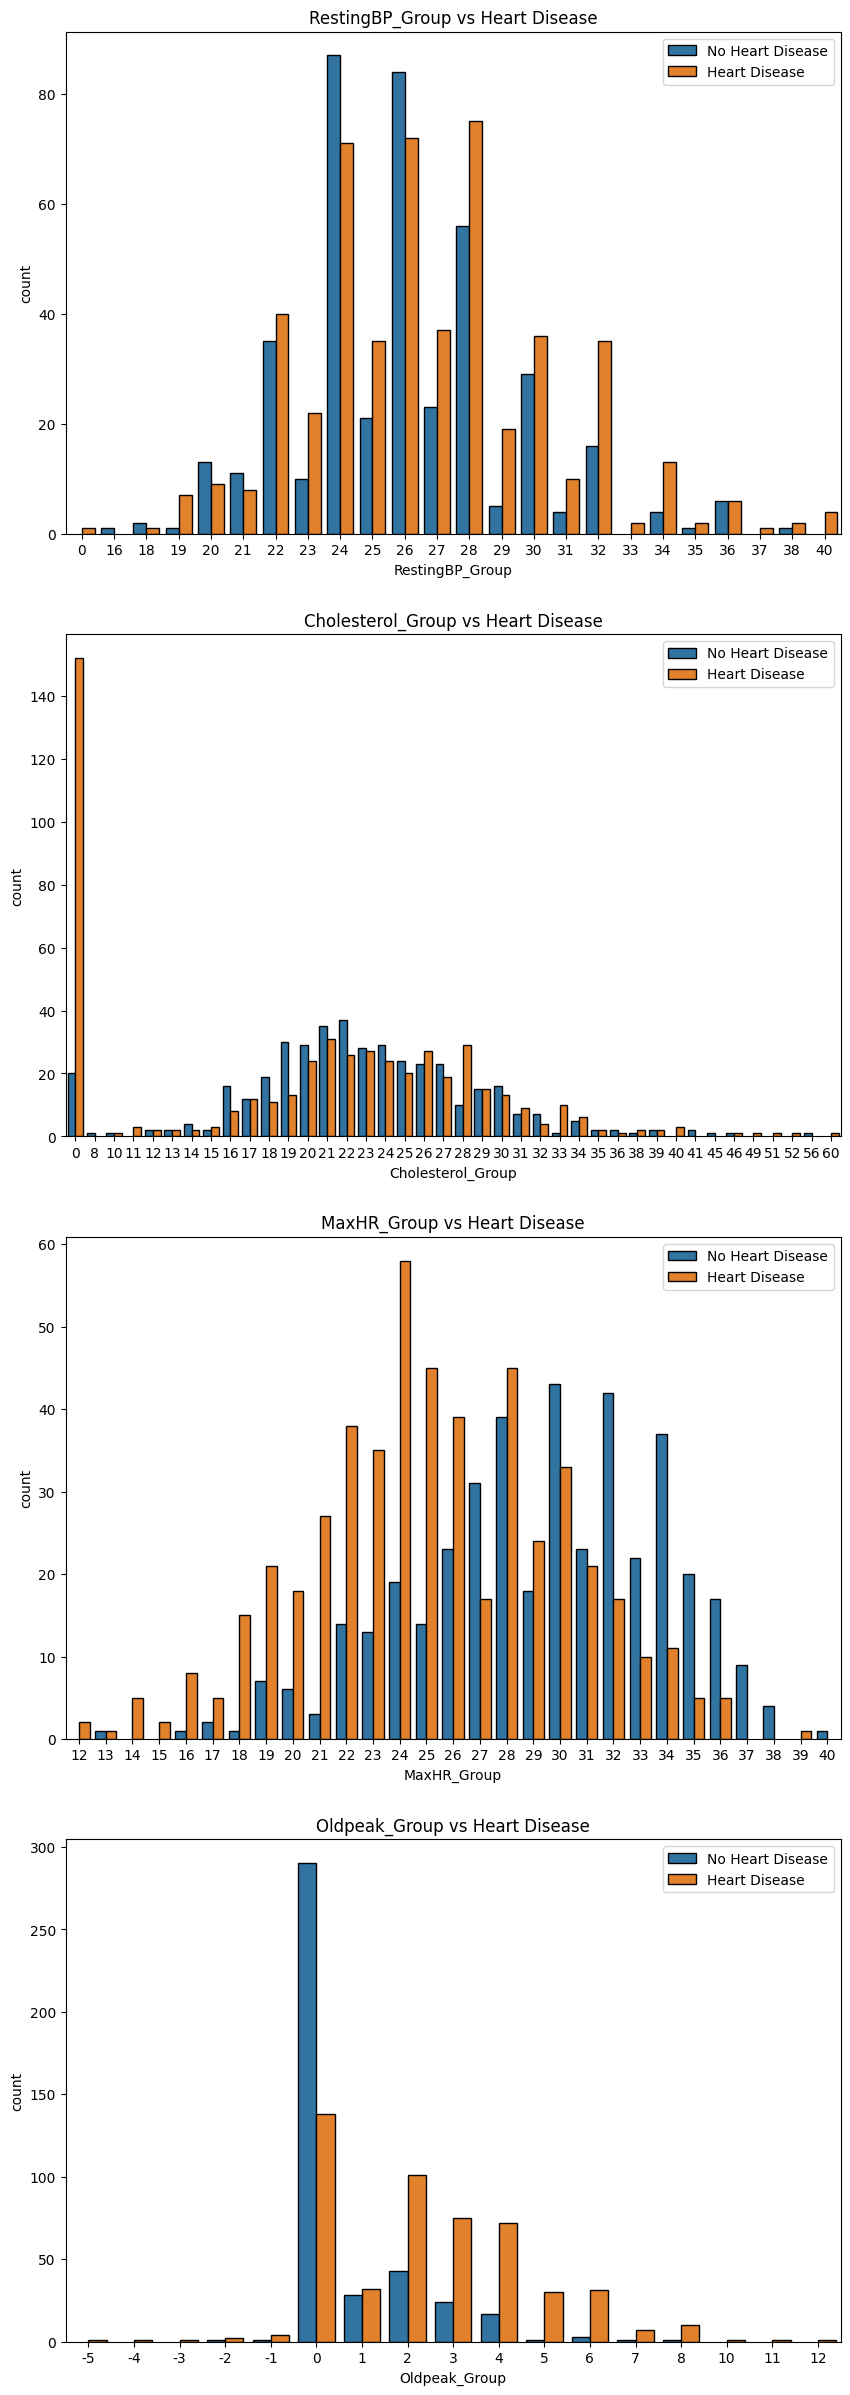

In [39]:
fig, ax = plt.subplots(nrows = 4,ncols = 1,figsize = (10,30))
for i in range(len(group_numerical_features)):
    plt.subplot(4,1,i+1)
    sns.countplot(x=group_numerical_features[i], data=discrete_data, hue="HeartDisease", edgecolor='black')
    title = group_numerical_features[i] + ' vs Heart Disease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title)

> <br>
> 
> **🤔 Conclusions:** 
> - people with `age` values between (55-77) are highely compromised to be diagnosed with heart failure.
> - people with `Oldpeak` values between (0.5-6) are highely compromised to be diagnosed with heart failure. 
> - people with `Cholesterol` values between (220-230) and (330-400) are highely compromised to be diagnosed with heart failure. 
> - people with `MaxHR` values between (60-130) and (140-145) are highely compromised to be diagnosed with heart failure. 
> - people with `RestingBP` values between (135-200) are highely compromised to be diagnosed with heart failure. 
> <br>
> <br>

# <a id='toc7_'></a>[PCA](#toc0_)

In [ ]:
def plot_2d_3d(df):
    """
    Displays either a 2D or 3D scatter plot of features in a DataFrame.
    Prioritizes 3D plotting if sufficient numerical columns exist.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
    """
    # Ensure DataFrame has numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns
    
    if len(numeric_columns) >= 3:
        # 3D Plot
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(
            df[numeric_columns[0]],
            df[numeric_columns[1]],
            df[numeric_columns[2]],
            c='red',
            alpha=0.6
        )
        ax.set_title(f"3D Scatter Plot ({numeric_columns[0]}, {numeric_columns[1]}, {numeric_columns[2]})")
        ax.set_xlabel(numeric_columns[0])
        ax.set_ylabel(numeric_columns[1])
        ax.set_zlabel(numeric_columns[2])
        plt.show()
    elif len(numeric_columns) >= 2:
        # 2D Plot
        plt.figure(figsize=(8, 6))
        plt.scatter(df[numeric_columns[0]], df[numeric_columns[1]], c='blue', alpha=0.6)
        plt.title(f"2D Scatter Plot ({numeric_columns[0]} vs {numeric_columns[1]})")
        plt.xlabel(numeric_columns[0])
        plt.ylabel(numeric_columns[1])
        plt.grid(True)
        plt.show()
    else:
        print("The DataFrame must have at least 2 numerical columns for plotting.")


## <a id='toc7_1_'></a>[PCA 1D](#toc0_)

### <a id='toc7_1_1_'></a>[Usnig MinMax Scaling](#toc0_)

In [ ]:
PCA_1D = PCA(n_components=1)

In [ ]:
pca_result_MMB_2D = PCA_1D.fit_transform(df_MM_scaled)

In [ ]:
pca_MMB_1D.score(df_MM_scaled)

In [ ]:
# pca_df_MMB_1D = pd.DataFrame(pca_result_MMB_1D, columns=['PCA_F1'])
# pca_df_MMB_1D['HeartDisease'] = df['HeartDisease'].values

NameError: name 'pca_result_MMB_1D' is not defined

In [ ]:
# pca_df_MMB_1D

,PCA_F1,HeartDisease
0,-0.508560,0
1,-0.701778,1
2,-0.389375,0
3,0.314913,1
4,-0.505894,0
...,...,...
913,-0.468736,1
914,0.116104,1
915,0.651858,1
916,-0.674650,1


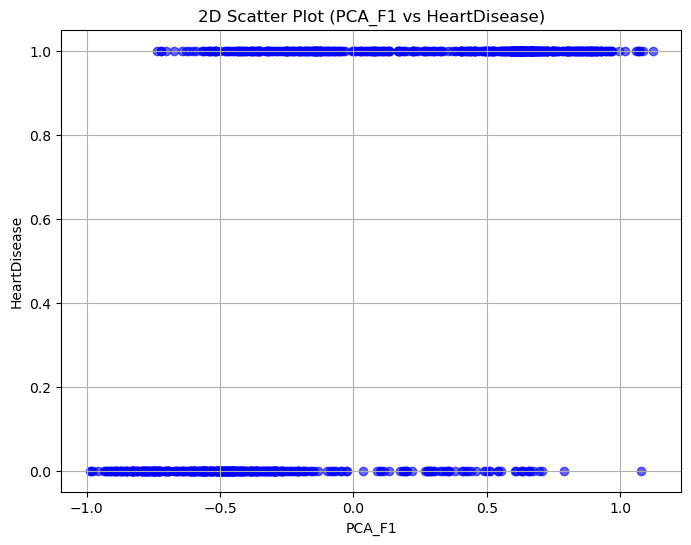

In [ ]:
# plot_2d_3d(pca_df_MMB_1D)

In [ ]:
# pca_STDB_1D = PCA(n_components=1)
# pca_result_STDB_1D = pca_STDB_1D.fit_transform(df_STD_scaled)
# pca_STDB_1D.score(df_MM_scaled)

-11.889757509549675

In [ ]:
# pca_df_STDB_1D = pd.DataFrame(pca_result_STDB_1D, columns=['PCA_F1'])
# pca_df_STDB_1D['HeartDisease'] = df['HeartDisease'].values

In [ ]:
# pca_df_STDB_1D

,PCA_F1,HeartDisease
0,2.261181,0
1,1.137621,1
2,1.101846,0
3,-0.980703,1
4,1.046800,0
...,...,...
913,1.179165,1
914,-2.021615,1
915,-1.663972,1
916,1.701615,1


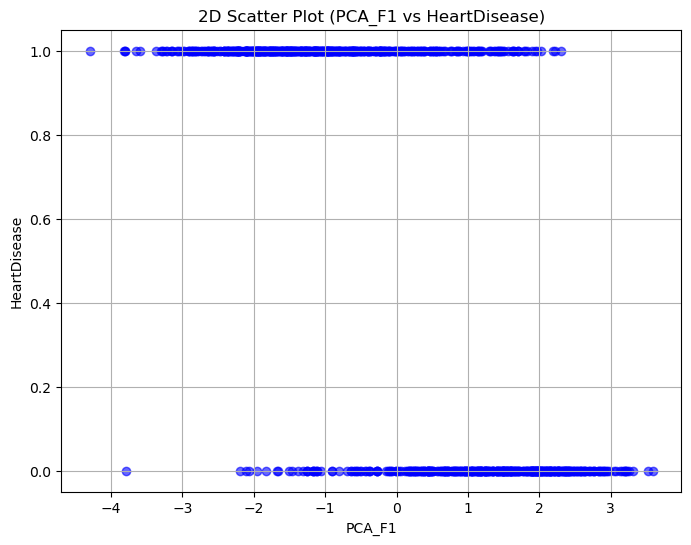

In [ ]:
# plot_2d_3d(pca_df_STDB_1D)

## <a id='toc7_2_'></a>[PCA before Preprocessing 2D with the label concatenated](#toc0_)

### <a id='toc7_2_1_'></a>[Usnig MinMax Scaling](#toc0_)

In [ ]:
pca_MMB_2D = PCA(n_components=2)
pca_result_MMB_2D = pca_MMB_2D.fit_transform(df_MM_scaled)

In [ ]:
pca_MMB_2D.score(df_MM_scaled)

-1.169313778226141

In [ ]:
# pca.

In [ ]:
pca_df_MMB_2D = pd.DataFrame(pca_result_MMB_2D, columns=['PCA_F1','PCA_F2'])
pca_df_MMB_2D['HeartDisease'] = df['HeartDisease'].values

In [ ]:
pca_df_MMB_2D

,PCA_F1,PCA_F2,HeartDisease
0,-0.508560,-0.017989,0
1,-0.701778,-0.250185,1
2,-0.389375,0.041581,0
3,0.314913,-0.679467,1
4,-0.505894,0.046648,0
...,...,...,...
913,-0.468736,0.042977,1
914,0.116104,0.860054,1
915,0.651858,-0.358345,1
916,-0.674650,-0.330580,1


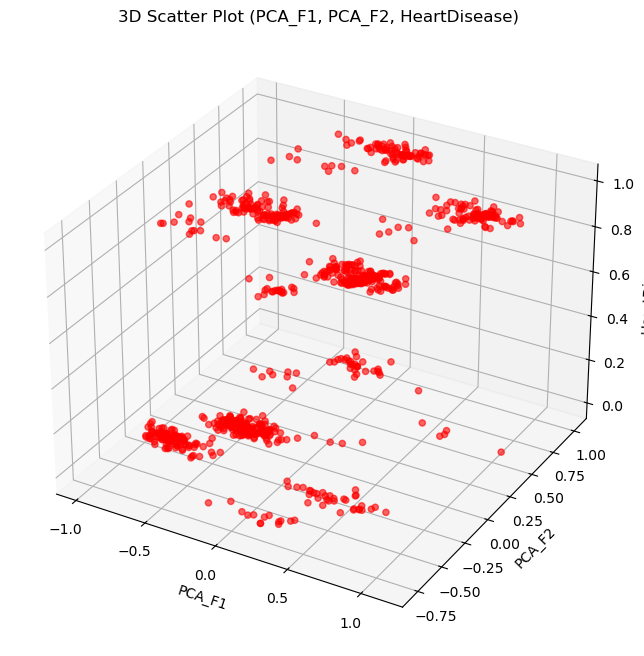

In [ ]:
plot_2d_3d(pca_df_MMB_2D)

### <a id='toc7_2_2_'></a>[Standard Scale](#toc0_)

In [ ]:
pca_STDB_2D = PCA(n_components=2)
pca_result_STDB_2D = pca_STDB_2D.fit_transform(df_STD_scaled)
pca_STDB_2D.score(df_MM_scaled)

-11.939395132288372

In [ ]:
pca_df_STDB_2D = pd.DataFrame(pca_result_STDB_2D, columns=['PCA_F1','PCA_F2'])
pca_df_STDB_2D['HeartDisease'] = df['HeartDisease'].values

In [ ]:
pca_df_STDB_2D

,PCA_F1,PCA_F2,HeartDisease
0,2.261181,0.169797,0
1,1.137621,1.097544,1
2,1.101846,-1.167057,0
3,-0.980703,1.113893,1
4,1.046800,-0.395467,0
...,...,...,...
913,1.179165,0.062925,1
914,-2.021615,0.329905,1
915,-1.663972,-0.093808,1
916,1.701615,1.426254,1


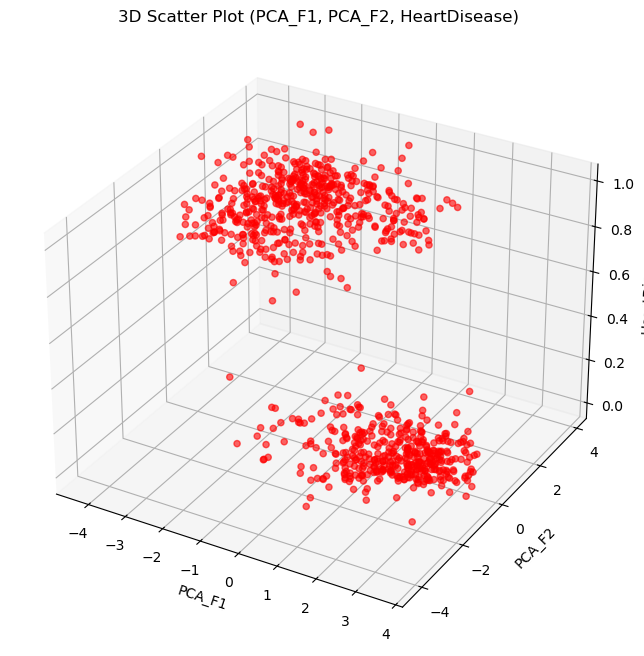

In [ ]:
plot_2d_3d(pca_df_STDB_2D)

# <a id='toc8_'></a>[Data Cleaning and Preprocessing](#toc0_)

## <a id='toc8_1_'></a>[Missing Values](#toc0_)

> <br>
> 
> **💡Note:** *Cholesterol* of a person can never be 0. These 0s will be replaced with median values of the corresponding columns, that's because medians aren't affected by outliers. <br>
> <br>
> 


### <a id='toc8_1_1_'></a>[Cholesterol](#toc0_)

> We will try three methods
> - Dropping rows with cholesterol==0
> - Replacing with mean
> - Replacing with Median
>
> then get the correlation with the target column to see which approach will give the best correlation

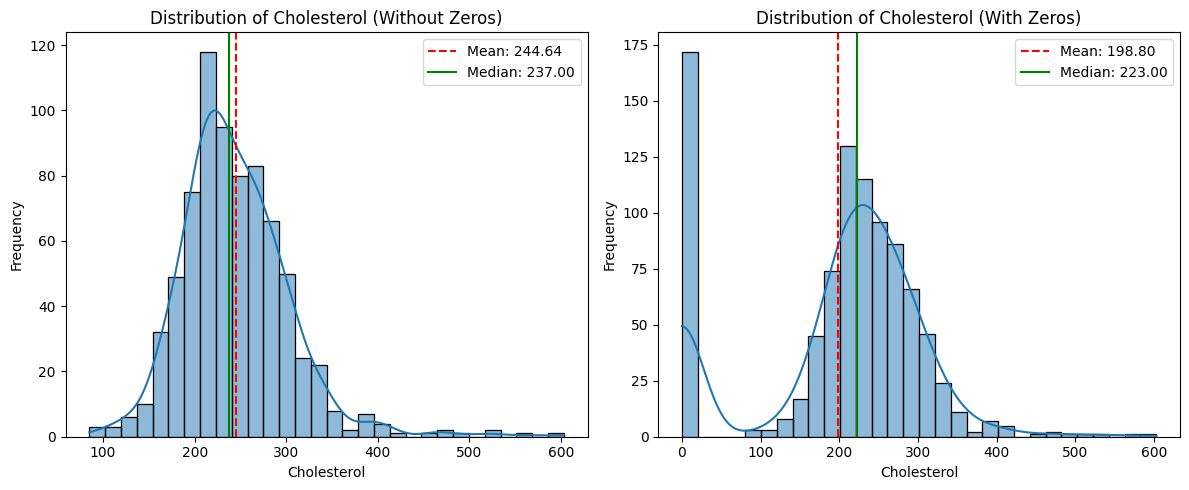

In [ ]:
mean_cholesterol = data[data['Cholesterol'] != 0]['Cholesterol'].mean()
median_cholesterol = data[data['Cholesterol'] != 0]['Cholesterol'].median()

mean_cholesterol_with_zeros = data['Cholesterol'].mean()
median_cholesterol_with_zeros = data['Cholesterol'].median()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.histplot(data[data['Cholesterol'] != 0]['Cholesterol'], bins=30, kde=True, ax=axes[0])
axes[0].axvline(mean_cholesterol, color='r', linestyle='--', label=f'Mean: {mean_cholesterol:.2f}')
axes[0].axvline(median_cholesterol, color='g', linestyle='-', label=f'Median: {median_cholesterol:.2f}')
axes[0].set_title('Distribution of Cholesterol (Without Zeros)')
axes[0].set_xlabel('Cholesterol')
axes[0].set_ylabel('Frequency')
axes[0].legend()

sns.histplot(data['Cholesterol'], bins=30, kde=True, ax=axes[1])
axes[1].axvline(mean_cholesterol_with_zeros, color='r', linestyle='--', label=f'Mean: {mean_cholesterol_with_zeros:.2f}')
axes[1].axvline(median_cholesterol_with_zeros, color='g', linestyle='-', label=f'Median: {median_cholesterol_with_zeros:.2f}')
axes[1].set_title('Distribution of Cholesterol (With Zeros)')
axes[1].set_xlabel('Cholesterol')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

In [42]:
data['Cholesterol'].mean()

198.7995642701525

In [43]:
data['Cholesterol'].median()

223.0

In [44]:
data['Cholesterol'].replace(0, np.nan).dropna().mean()

244.6353887399464

In [45]:
data['Cholesterol'].replace(0, np.nan).dropna().median()

237.0

> Dropping rows with Cholesterol==0

In [90]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122,N,0.0,Up,0


In [91]:
data['Cholesterol'].describe()

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

In [92]:
data[data['Cholesterol']==0].shape[0]

172

In [93]:
drop_corr = round(data['Cholesterol'].replace(0, np.nan).dropna().corr(data['HeartDisease']),3)
print("Correlation between Cholesterol and HeartDisease after dropping=",drop_corr)

Correlation between Cholesterol and HeartDisease after dropping= 0.104


> Replacing rows with Cholesterol==0 with mean value

In [23]:
mean_corr = round(data['Cholesterol'].replace(0, data[data['Cholesterol']!=0]['Cholesterol'].mean()).corr(data['HeartDisease']),3)
print("Correlation between Cholesterol and HeartDisease after replacing with mean=",mean_corr)

Correlation between Cholesterol and HeartDisease after replacing with mean= 0.094


> Replacing rows with Cholesterol==0 with median value

In [25]:
median_corr = round(data['Cholesterol'].replace(0, data[data['Cholesterol']!=0]['Cholesterol'].median()).corr(data['HeartDisease']),3)
print("Correlation between Cholesterol and HeartDisease after replacing with median=",median_corr)

Correlation between Cholesterol and HeartDisease after replacing with median= 0.076


> **💡Note:** as we see the best correlation appears when dropping the colesterol

> to ensure the results will get the correlation before and after the dropping for each feature and get the difference between them

In [26]:
data_encoded = data.copy()
encoder = LabelEncoder()
for col in data_encoded.columns:
    if data_encoded[col].dtype == 'object':
        data_encoded[col] = encoder.fit_transform(data_encoded[col])

In [27]:
df_before_drop = data_encoded.copy()
df_after_drop = data_encoded.copy()

df_after_drop['Cholesterol'] = df_after_drop['Cholesterol'].replace(0, np.nan)
df_after_drop.dropna(inplace=True)

corr_before = round(df_before_drop.corr().sort_values('HeartDisease',ascending=False).iloc[1:, :]['HeartDisease'],3)
corr_after = round(df_after_drop.corr().sort_values('HeartDisease',ascending=False).iloc[1:, :]['HeartDisease'],3)

In [28]:
difference_df = pd.concat([corr_before, corr_after,(corr_after - corr_before)], axis=1)
difference_df.columns = ['corr_before_drop_0','corr_after_drop_0','difference']
difference_df

,corr_before_drop_0,corr_after_drop_0,difference
ExerciseAngina,0.494,0.552,0.058
Oldpeak,0.404,0.496,0.092
Sex,0.305,0.293,-0.012
Age,0.282,0.299,0.017
FastingBS,0.267,0.161,-0.106
RestingBP,0.108,0.173,0.065
RestingECG,0.057,0.010,-0.047
Cholesterol,-0.233,0.104,0.337
ChestPainType,-0.387,-0.396,-0.009
MaxHR,-0.400,-0.377,0.023


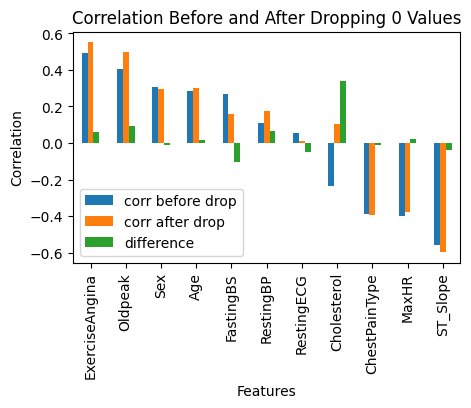

In [29]:
difference_df = pd.concat([corr_before, corr_after,(corr_after - corr_before)], axis=1)
difference_df.columns = ['corr before drop','corr after drop','difference']
difference_df.plot(kind='bar', figsize=(5, 3))
plt.title('Correlation Before and After Dropping 0 Values')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

In [30]:
df_after_mean = data_encoded.copy()

df_after_mean['Cholesterol'] = df_after_mean['Cholesterol'].replace(0, df_after_mean[df_after_mean['Cholesterol']!=0]['Cholesterol'].mean())

corr_before = round(df_before_drop.corr().sort_values('HeartDisease',ascending=False).iloc[1:, :]['HeartDisease'],3)
corr_after = round(df_after_mean.corr().sort_values('HeartDisease',ascending=False).iloc[1:, :]['HeartDisease'],3)

In [31]:
difference_df = pd.concat([corr_before, corr_after,(corr_after - corr_before)], axis=1)
difference_df.columns = ['corr_before_mean_0','corr_after_mean_0','difference']
difference_df

,corr_before_mean_0,corr_after_mean_0,difference
ExerciseAngina,0.494,0.494,0.000
Oldpeak,0.404,0.404,0.000
Sex,0.305,0.305,0.000
Age,0.282,0.282,0.000
FastingBS,0.267,0.267,0.000
RestingBP,0.108,0.108,0.000
RestingECG,0.057,0.057,0.000
Cholesterol,-0.233,0.094,0.327
ChestPainType,-0.387,-0.387,0.000
MaxHR,-0.400,-0.400,0.000


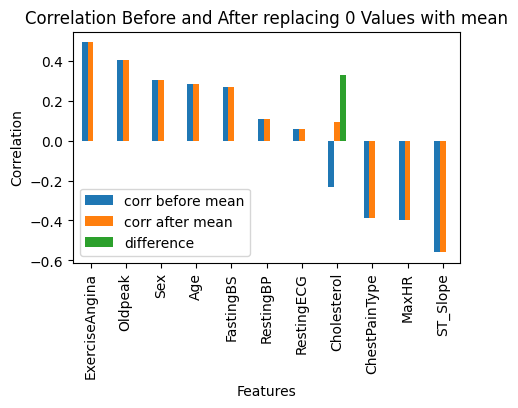

In [32]:
difference_df = pd.concat([corr_before, corr_after,(corr_after - corr_before)], axis=1)
difference_df.columns = ['corr before mean','corr after mean','difference']
difference_df.plot(kind='bar', figsize=(5, 3))
plt.title('Correlation Before and After replacing 0 Values with mean')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

In [33]:
df_after_median = data_encoded.copy()

df_after_median['Cholesterol'] = df_after_median['Cholesterol'].replace(0, df_after_median[df_after_median['Cholesterol']!=0]['Cholesterol'].median())

corr_before = round(df_before_drop.corr().sort_values('HeartDisease',ascending=False).iloc[1:, :]['HeartDisease'],3)
corr_after = round(df_after_median.corr().sort_values('HeartDisease',ascending=False).iloc[1:, :]['HeartDisease'],3)

In [34]:
difference_df = pd.concat([corr_before, corr_after,(corr_after - corr_before)], axis=1)
difference_df.columns = ['corr_before_median_0','corr_after_median_0','difference']
difference_df

,corr_before_median_0,corr_after_median_0,difference
ExerciseAngina,0.494,0.494,0.000
Oldpeak,0.404,0.404,0.000
Sex,0.305,0.305,0.000
Age,0.282,0.282,0.000
FastingBS,0.267,0.267,0.000
RestingBP,0.108,0.108,0.000
RestingECG,0.057,0.057,0.000
Cholesterol,-0.233,0.076,0.309
ChestPainType,-0.387,-0.387,0.000
MaxHR,-0.400,-0.400,0.000


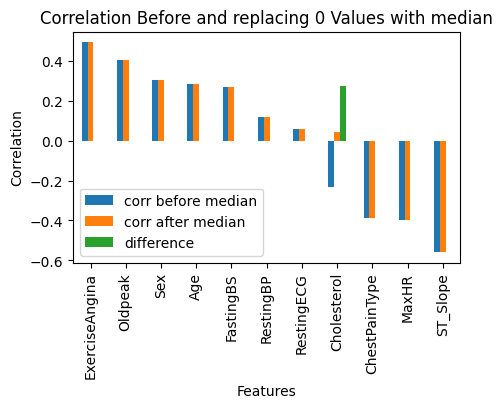

In [111]:
difference_df = pd.concat([corr_before, corr_after,(corr_after - corr_before)], axis=1)
difference_df.columns = ['corr before median','corr after median','difference']
difference_df.plot(kind='bar', figsize=(5, 3))
plt.title('Correlation Before and replacing 0 Values with median')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

> **💭Decision:** we decided to replace with `median` values, because it's true that `dropping` them makes better correlation coeff for `Cholesterol` but it affected other features' Correlation<br> <br>
> in addition to that `median` instead of `mean` because medical data like cholesterol often has naturally occurring outliers because of the variance in patient conditions. The `median` value ensures that these valid outliers don't influence the changed values alot.<br> <br>
> the correlation isn't that higher when imputing with mean than with median, regardless that the task is a classification problem, and correlation coeff may not show that much intuition about the resulting output <br> <br>
> the effect of correlation does depend on the type of classifier. Some nonparametric classifiers are less sensitive to correlation of variable.

In [47]:
data['Cholesterol'].median()

223.0

In [49]:
data['Cholesterol'].replace(0,np.nan).dropna().median()

237.0

In [50]:
data['Cholesterol'] = data['Cholesterol'].replace(0, data['Cholesterol'].replace(0,np.nan).dropna().median())

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122,N,0.0,Up,0


### <a id='toc8_1_2_'></a>[RestingBP](#toc0_)

> **💡Note:** *Resting Blood Pressure* of a person can never be 0. these 0s will be replaced with median values of the corresponding columns, that's because medians aren't affected by outliers <br>
> <br>

> **🤔Conclusion:** RestingBP can't be zero, so it will be considered as a missing value

In [114]:
data[data['RestingBP']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [51]:
data['RestingBP'].mean()

132.39651416122004

In [52]:
data['RestingBP'].median()

130.0

In [54]:
data[data['RestingBP'] != 0]['RestingBP'].mean()

132.54089422028352

In [55]:
data[data['RestingBP'] != 0]['RestingBP'].median()

130.0

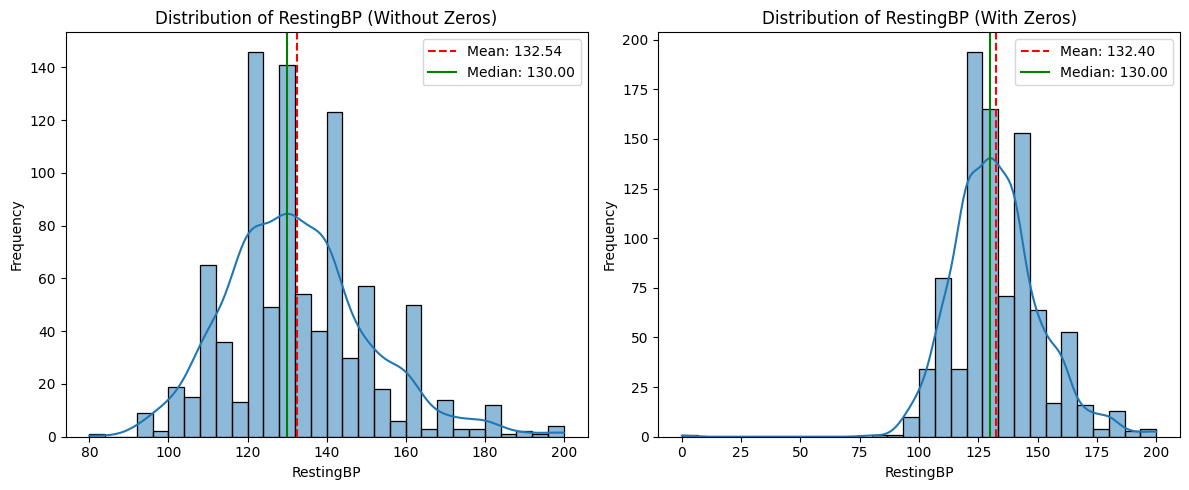

In [56]:
mean_RestingBP = data[data['RestingBP'] != 0]['RestingBP'].mean()
median_RestingBP = data[data['RestingBP'] != 0]['RestingBP'].median()

mean_RestingBP_with_zeros = data['RestingBP'].mean()
median_RestingBP_with_zeros = data['RestingBP'].median()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.histplot(data[data['RestingBP'] != 0]['RestingBP'], bins=30, kde=True, ax=axes[0])
axes[0].axvline(mean_RestingBP, color='r', linestyle='--', label=f'Mean: {mean_RestingBP:.2f}')
axes[0].axvline(median_RestingBP, color='g', linestyle='-', label=f'Median: {median_RestingBP:.2f}')
axes[0].set_title('Distribution of RestingBP (Without Zeros)')
axes[0].set_xlabel('RestingBP')
axes[0].set_ylabel('Frequency')
axes[0].legend()

sns.histplot(data['RestingBP'], bins=30, kde=True, ax=axes[1])
axes[1].axvline(mean_RestingBP_with_zeros, color='r', linestyle='--', label=f'Mean: {mean_RestingBP_with_zeros:.2f}')
axes[1].axvline(median_RestingBP_with_zeros, color='g', linestyle='-', label=f'Median: {median_RestingBP_with_zeros:.2f}')
axes[1].set_title('Distribution of RestingBP (With Zeros)')
axes[1].set_xlabel('RestingBP')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

> **💡Note:** as the `RestingBP` feature is almost normally distributed "after removing zero values" as `mean almost equals median`, we decided to replace them with the median value

In [57]:
data['RestingBP'] = data['RestingBP'].replace(0, data['RestingBP'].replace(0,np.nan).dropna().median())

In [ ]:
data[data['RestingBP']==0].shape[0]

0

## <a id='toc8_2_'></a>[Outlier Removal](#toc0_)

> **💡Note:** TA could be converted to ATA, it could be a Typo error. "Overthinking" 

### <a id='toc8_2_1_'></a>[Cholesterol](#toc0_)

> **💡Note:** we won't remove any more outliers in Cholesterol column as it's a medical dataset which have a meaning of outliers and it's important to take these values in considiration

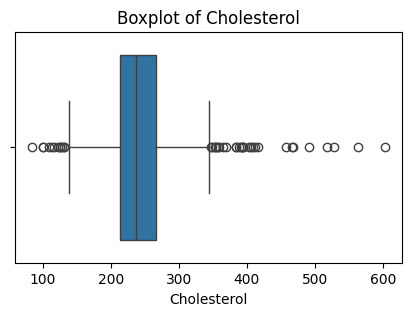

In [ ]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=data, x='Cholesterol')
plt.title('Boxplot of Cholesterol')
plt.xlabel('Cholesterol')
plt.show()

### <a id='toc8_2_2_'></a>[ChestPainType](#toc0_)

> **💡Note:** there are few rows with the value of `TA` but after a great search and asking doctors, it was obvious that these values are real and can't be ignored

In [116]:
data[data['ChestPainType']=='TA'].shape[0]

46

In [117]:
data[data['ChestPainType']=='TA']['HeartDisease'].value_counts()

HeartDisease
0    26
1    20
Name: count, dtype: int64

In [ ]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

## <a id='toc8_3_'></a>[Duplicates](#toc0_)

In [ ]:
data.duplicated().sum()

0

> **🤔Conclusion:** There is no duplicated rows in the dataset

## <a id='toc8_4_'></a>[Encoding](#toc0_)

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122,N,0.0,Up,0


In [61]:
columns_to_encode=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

In [ ]:
def Encode(data,columns,type='label'):
    data = data.copy()
    if type == 'label':
        encoder = LabelEncoder()
        for col in columns:
            data[col] = encoder.fit_transform(data[col])
    elif type == 'onehot':
        data = pd.get_dummies(data, columns=columns,dtype=int)
    else:
        raise Exception('Invalid Type')
    return data

### <a id='toc8_4_1_'></a>[Label Encoding](#toc0_)

In [ ]:
data_label_encoded = Encode(data,columns_to_encode,type='label')

In [ ]:
data_label_encoded.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


### <a id='toc8_4_2_'></a>[One Hot Encoding](#toc0_)

In [ ]:
data_onehot_encoded = Encode(data,columns_to_encode,type='onehot')

In [ ]:
data_onehot_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


## <a id='toc8_5_'></a>[Normalization](#toc0_)

In [ ]:
def Scale(data,columns,type='standard'):
    data = data.copy()
    if type == 'standard':
        scaler = StandardScaler()
        data[columns] = scaler.fit_transform(data[columns])
    elif type == 'minmax':
        scaler = MinMaxScaler()
        data[columns] = scaler.fit_transform(data[columns])
    else:
        raise Exception('Invalid Type')
    return data

### <a id='toc8_5_1_'></a>[MinMax Scaling](#toc0_)

In [ ]:
data_label_MM_scaled=Scale(data_label_encoded,data_label_encoded.columns.drop('HeartDisease'),type='minmax')

In [76]:
data_label_MM_scaled.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1.0,0.333333,0.500000,0.393822,0.0,0.5,0.788732,0.0,0.295455,1.0,0.0
1,0.428571,0.0,0.666667,0.666667,0.183398,0.0,0.5,0.676056,0.0,0.409091,0.5,1.0
2,0.183673,1.0,0.333333,0.416667,0.382239,0.0,1.0,0.267606,0.0,0.295455,1.0,0.0
3,0.408163,0.0,0.000000,0.483333,0.249035,0.0,0.5,0.338028,1.0,0.465909,0.5,1.0
4,0.530612,1.0,0.666667,0.583333,0.212355,0.0,0.5,0.436620,0.0,0.295455,1.0,0.0


In [ ]:
data_onehot_MM_scaled=Scale(data_onehot_encoded,data_onehot_encoded.columns.drop('HeartDisease'),type='minmax')

In [ ]:
data_onehot_MM_scaled.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.500000,0.393822,0.0,0.788732,0.295455,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.666667,0.183398,0.0,0.676056,0.409091,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.416667,0.382239,0.0,0.267606,0.295455,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.408163,0.483333,0.249035,0.0,0.338028,0.465909,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,0.583333,0.212355,0.0,0.436620,0.295455,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


### <a id='toc8_5_2_'></a>[Standard Scaler](#toc0_)

In [ ]:
data_label_encoded.columns.drop('HeartDisease')

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

In [90]:
data_label_STD_scaled=Scale(data_label_encoded,data_label_encoded.columns.drop('HeartDisease'),type='standard')

In [91]:
data_label_STD_scaled.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,0.515952,0.229032,0.415002,0.858035,-0.551341,0.017255,1.382928,-0.823556,-0.832432,1.052114,0
1,-0.478484,-1.938163,1.275059,1.527329,-1.184227,-0.551341,0.017255,0.754157,-0.823556,0.105664,-0.596078,1
2,-1.751359,0.515952,0.229032,-0.141161,0.745617,-0.551341,1.601219,-1.525138,-0.823556,-0.832432,1.052114,0
3,-0.584556,-1.938163,-0.816995,0.303769,-0.547191,-0.551341,0.017255,-1.132156,1.214246,0.574711,-0.596078,1
4,0.051881,0.515952,1.275059,0.971166,-0.903182,-0.551341,0.017255,-0.581981,-0.823556,-0.832432,1.052114,0


In [92]:
data_onehot_STD_scaled=Scale(data_onehot_encoded,data_onehot_encoded.columns.drop('HeartDisease'),type='standard')

In [93]:
data_onehot_STD_scaled.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.415002,0.858035,-0.551341,1.382928,-0.832432,0,-0.515952,0.515952,-1.084138,...,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674
1,-0.478484,1.527329,-1.184227,-0.551341,0.754157,0.105664,1,1.938163,-1.938163,-1.084138,...,1.876744,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056
2,-1.751359,-0.141161,0.745617,-0.551341,-1.525138,-0.832432,0,-0.515952,0.515952,-1.084138,...,-0.532838,-0.229679,-0.507478,-1.228087,2.038947,0.823556,-0.823556,-0.271448,-1.002181,1.150674
3,-0.584556,0.303769,-0.547191,-0.551341,-1.132156,0.574711,1,1.938163,-1.938163,0.922392,...,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,-1.214246,1.214246,-0.271448,0.997824,-0.869056
4,0.051881,0.971166,-0.903182,-0.551341,-0.581981,-0.832432,0,-0.515952,0.515952,-1.084138,...,1.876744,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674


> **💡Note:** Possible datasets until now are:
> - data_label_MM_scaled
> - data_onehot_MM_scaled
> - data_label_STD_scaled
> - data_onehot_STD_scaled

# <a id='toc9_'></a>[Models](#toc0_)

## <a id='toc9_1_'></a>[Phase 1](#toc0_)

### <a id='toc9_1_1_'></a>[Naive Bayes](#toc0_)

In [ ]:
# Code Bayoum

### <a id='toc9_1_2_'></a>[SVM](#toc0_)

## <a id='toc9_2_'></a>[Phase 2](#toc0_)

### <a id='toc9_2_1_'></a>[Decision Trees](#toc0_)

In [ ]:
# Code Mohamed Yasser

### <a id='toc9_2_2_'></a>[KNN](#toc0_)

## Extra Models

### <a id='toc9_2_3_'></a>[MLP](#toc0_)

### <a id='toc9_2_4_'></a>[Logistion Regression](#toc0_)

### <a id='toc9_2_5_'></a>[XGBoost](#toc0_)